In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [10]:
df = df.drop([ 'Unnamed: 0', 'track_id','artists','album_name','track_name','popularity', 'explicit'], axis=1)
print(df.columns)
df.head()

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')


,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [11]:
df.isnull().sum()

duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [12]:
df.shape

(114000, 14)

In [13]:
numeric = df._get_numeric_data()
genre = df['track_genre']
print(numeric.head())
print("Numeric columns: ", end=" ")
print(numeric.columns)
print(len (numeric.columns))
numeric.describe()

   duration_ms  danceability  energy  key  loudness  mode  speechiness  \
0       230666         0.676  0.4610    1    -6.746     0       0.1430   
1       149610         0.420  0.1660    1   -17.235     1       0.0763   
2       210826         0.438  0.3590    0    -9.734     1       0.0557   
3       201933         0.266  0.0596    0   -18.515     1       0.0363   
4       198853         0.618  0.4430    2    -9.681     1       0.0526   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0        0.0322          0.000001    0.3580    0.715   87.917               4  
1        0.9240          0.000006    0.1010    0.267   77.489               4  
2        0.2100          0.000000    0.1170    0.120   76.332               4  
3        0.9050          0.000071    0.1320    0.143  181.740               3  
4        0.4690          0.000000    0.0829    0.167  119.949               4  
Numeric columns:  Index(['duration_ms', 'danceability', 'energy', 'key', 'l

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
num_hist= numeric.hist (layout=(3,5), figsize=(20,10))
plt.show()

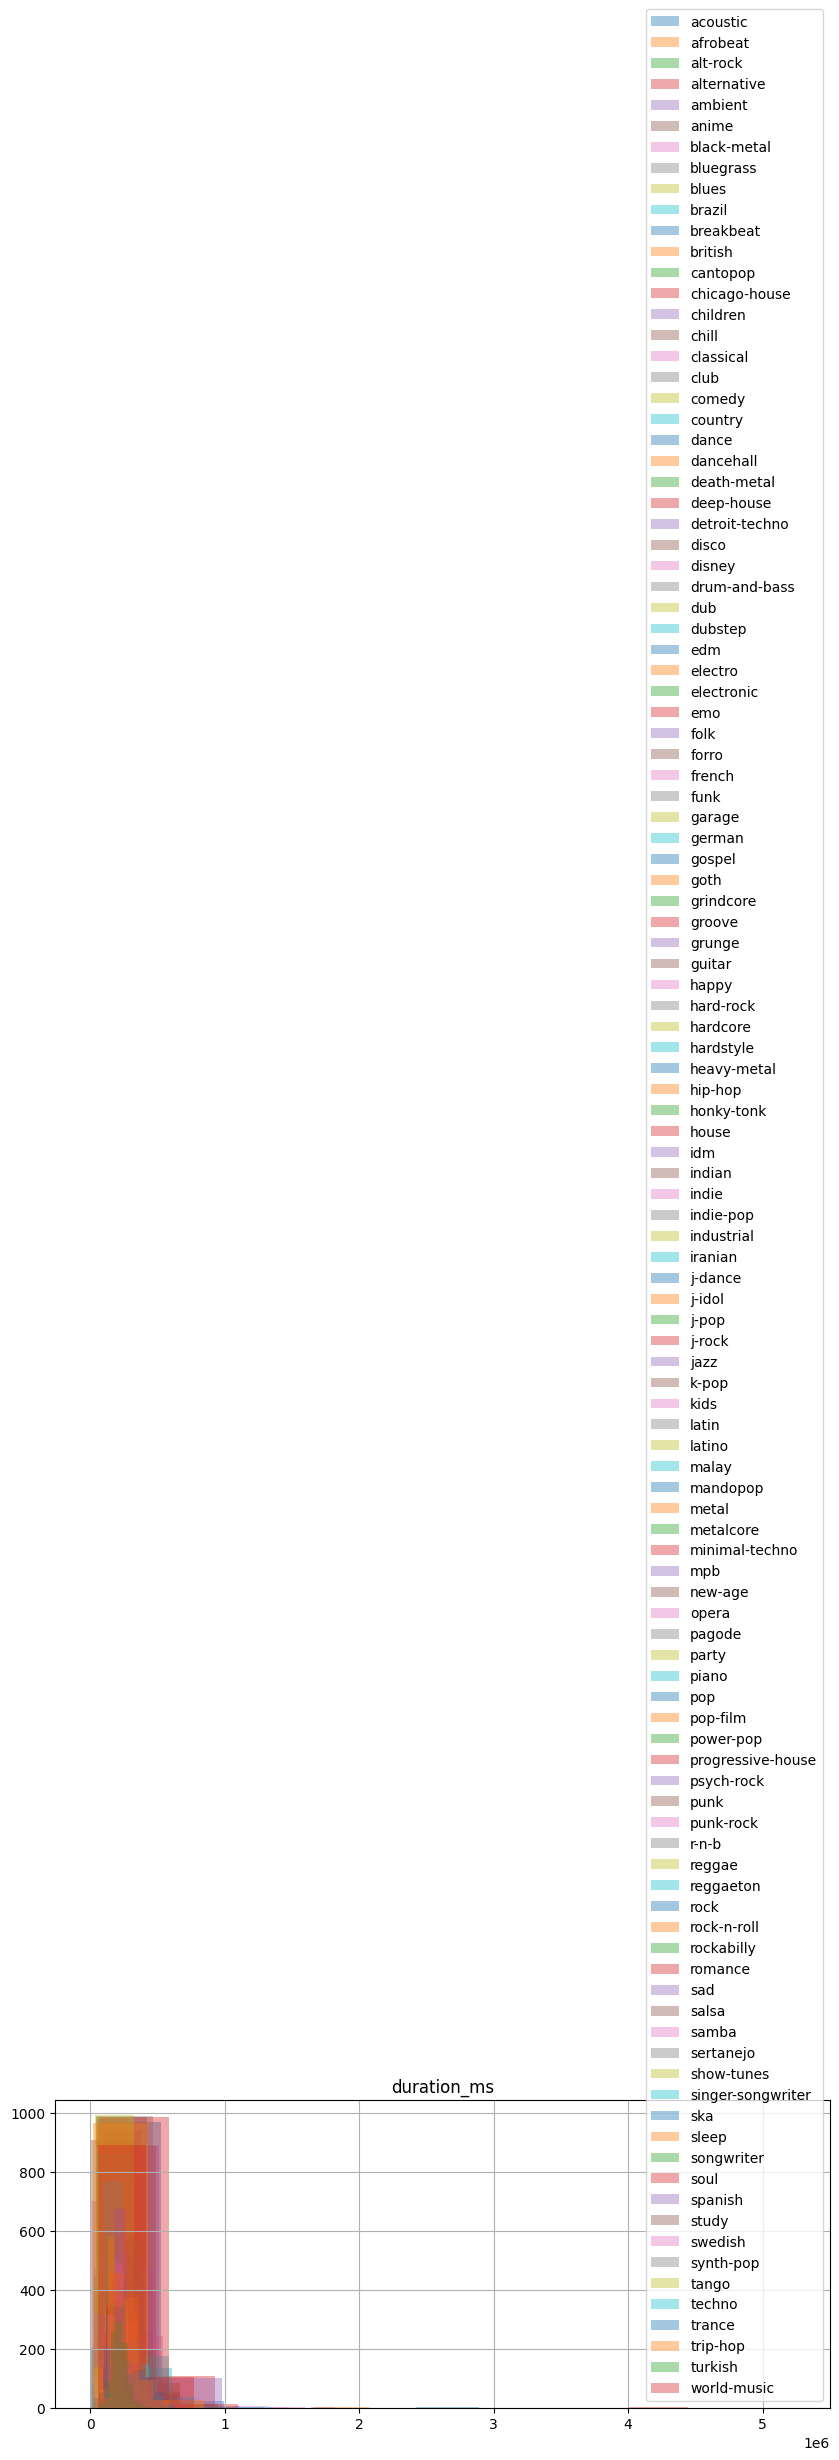

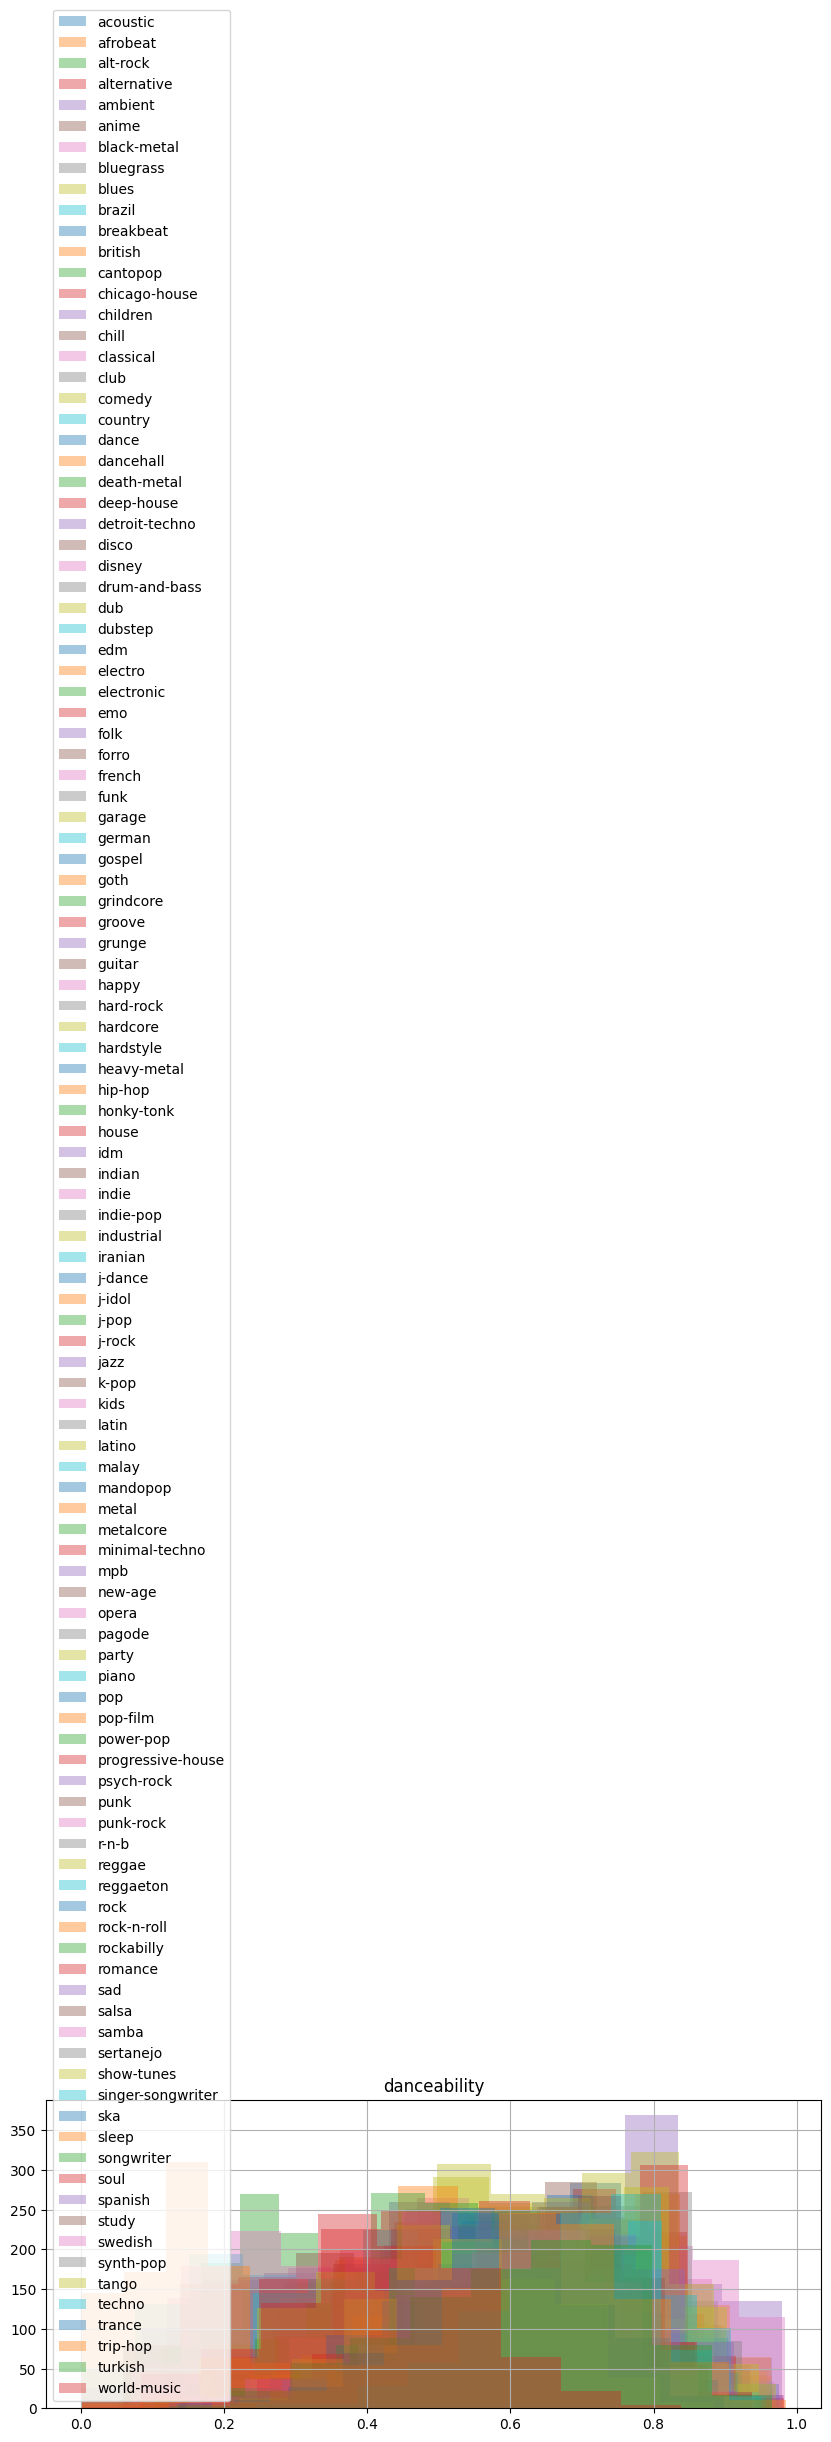

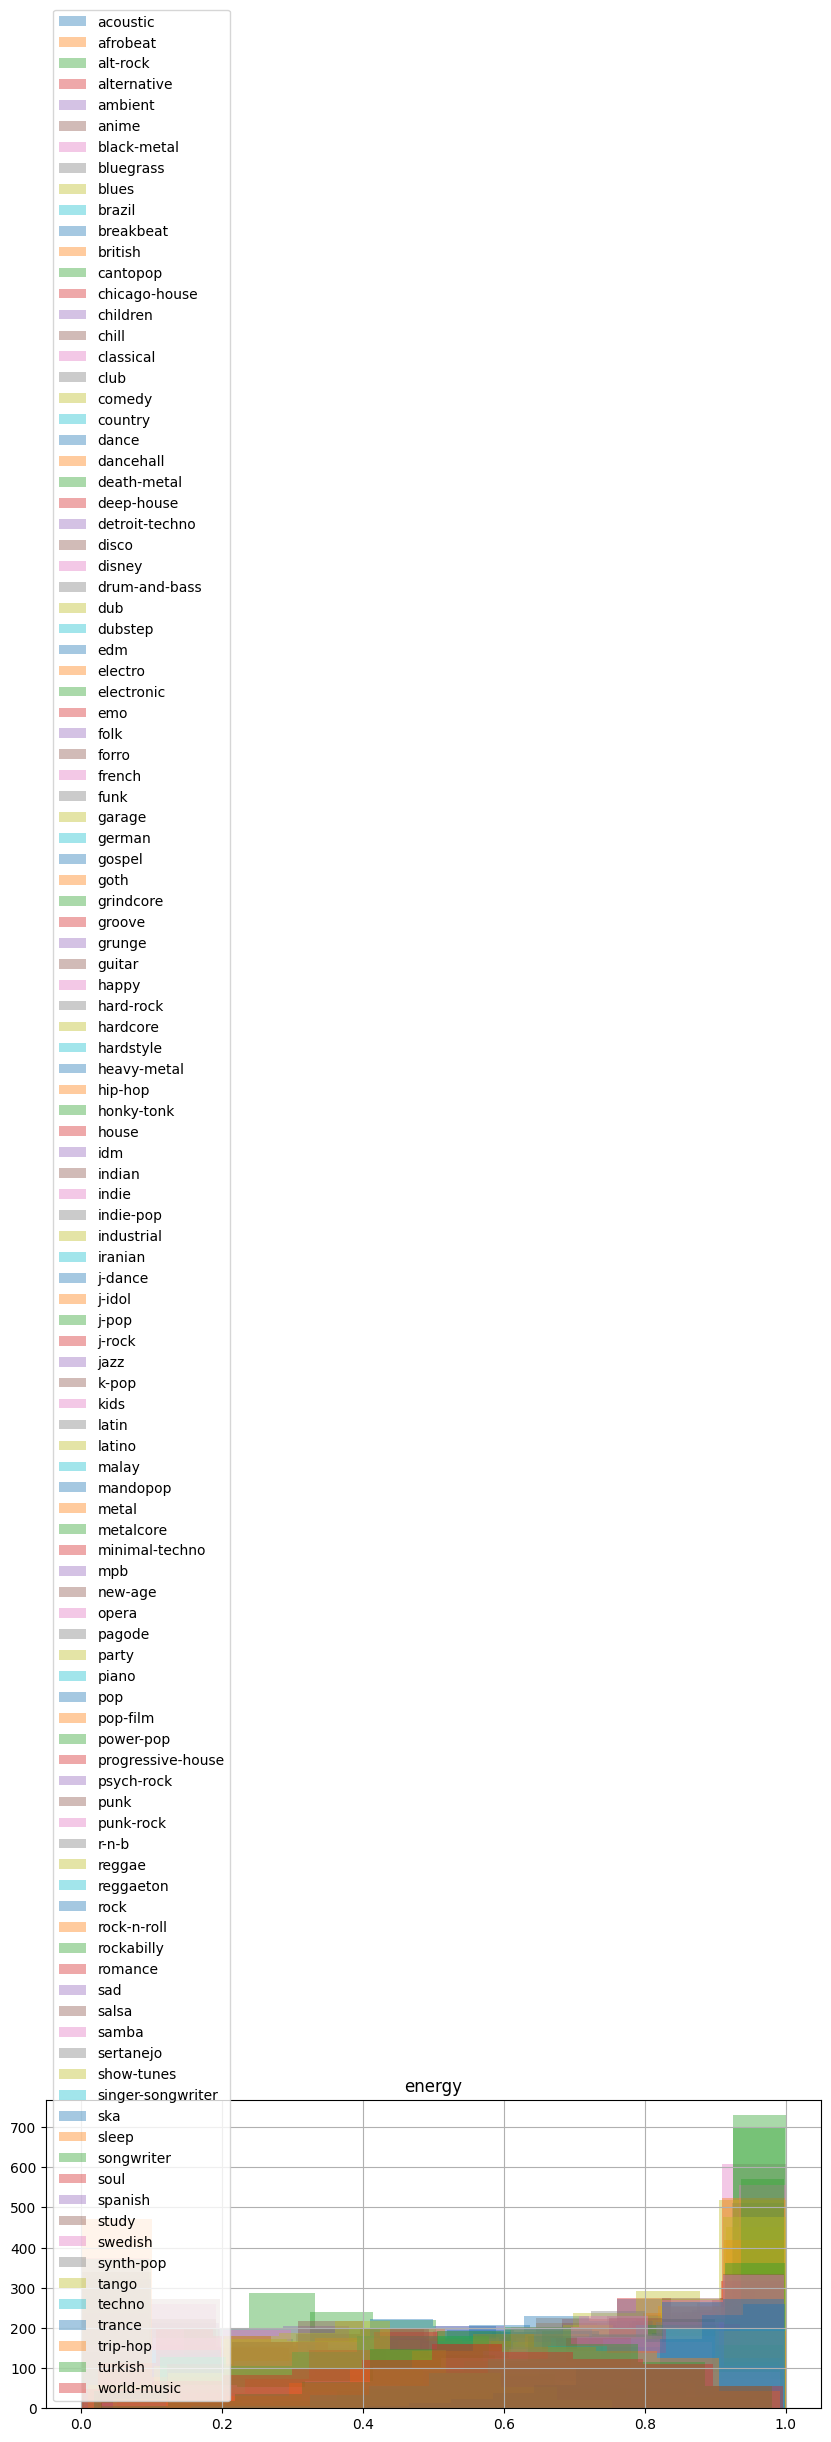

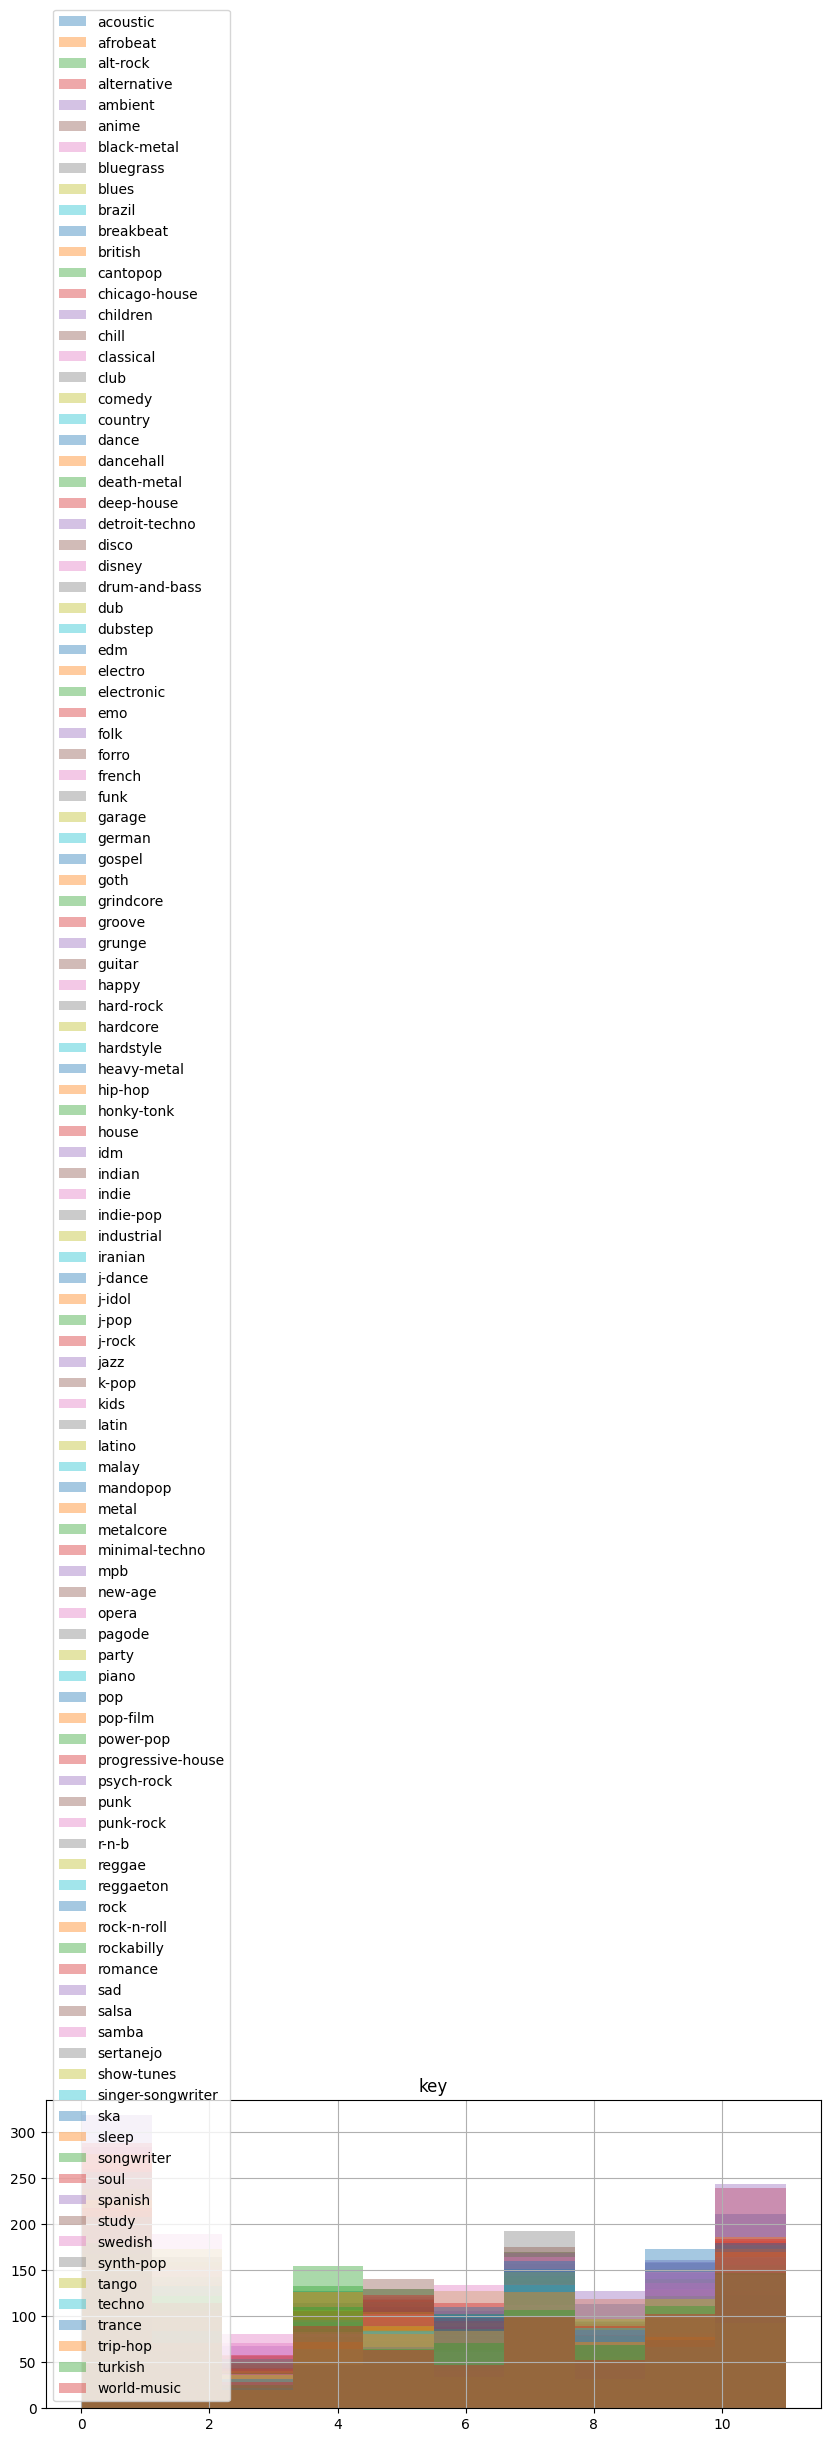

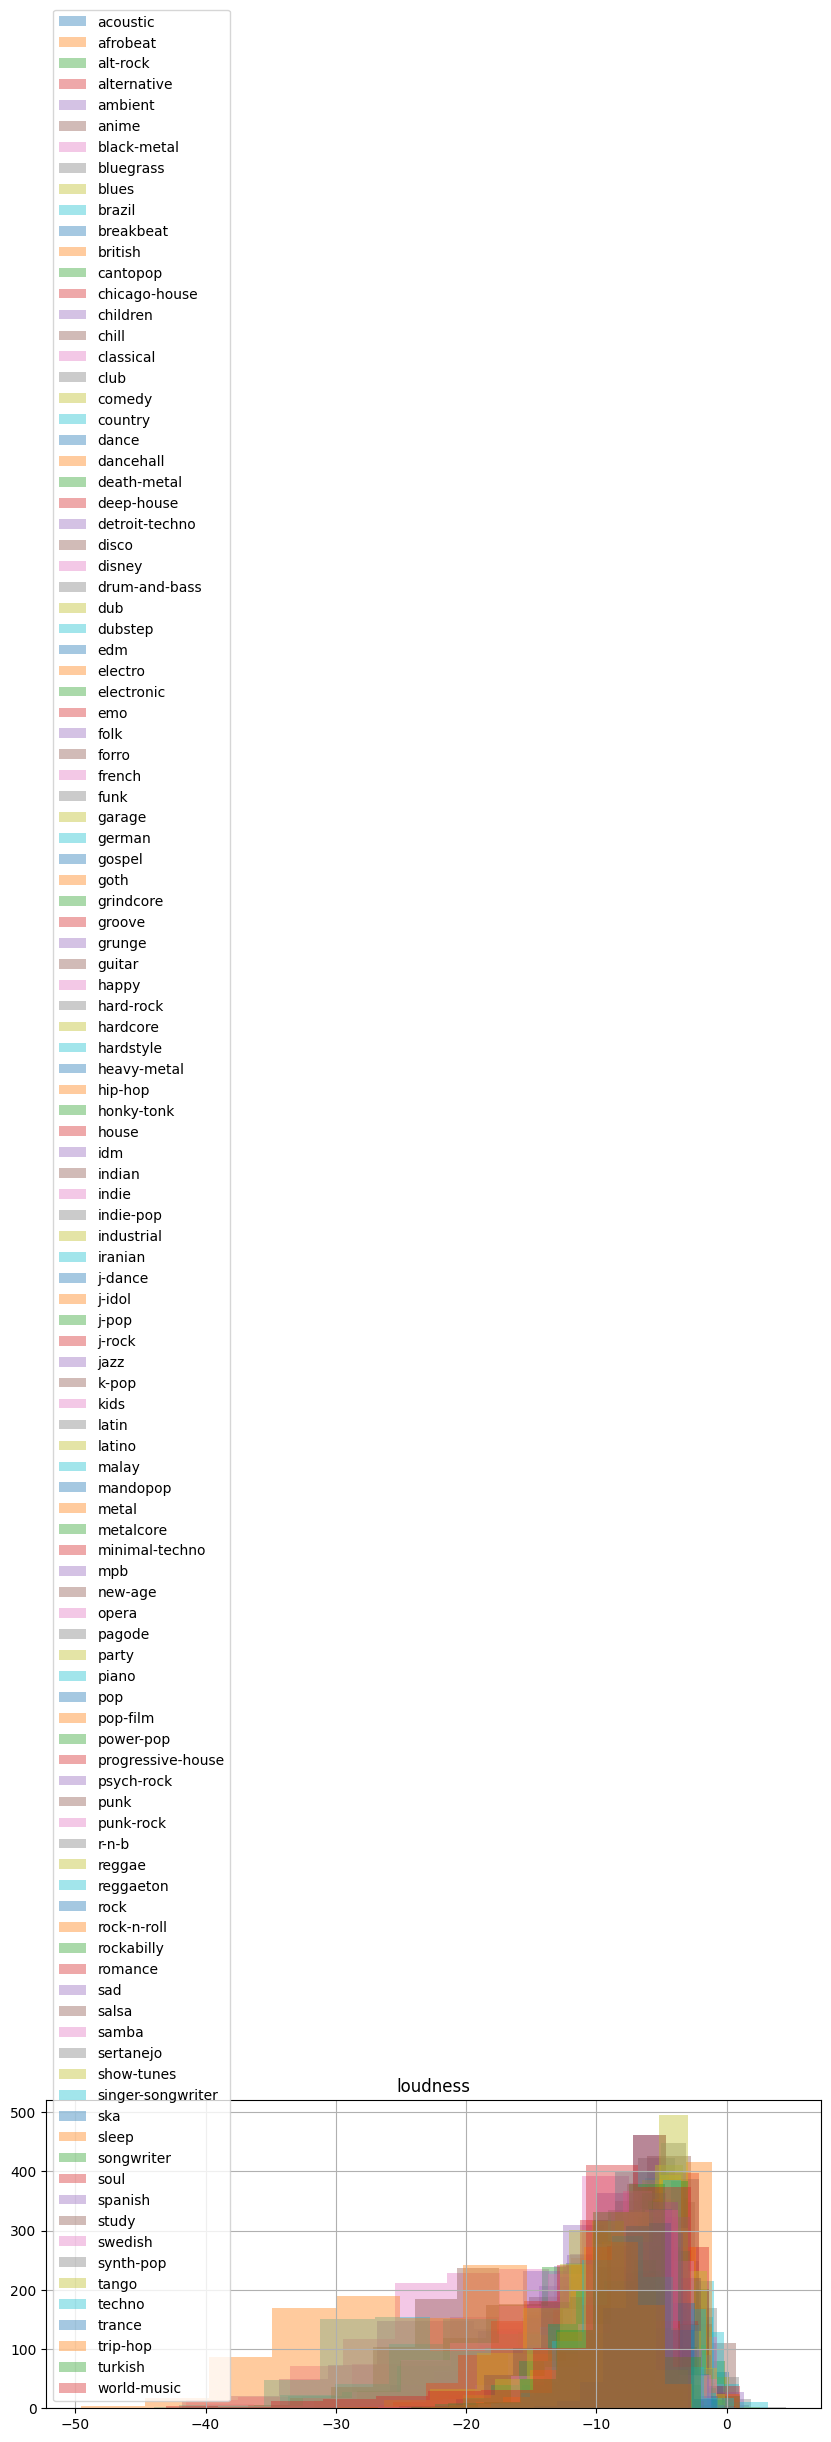

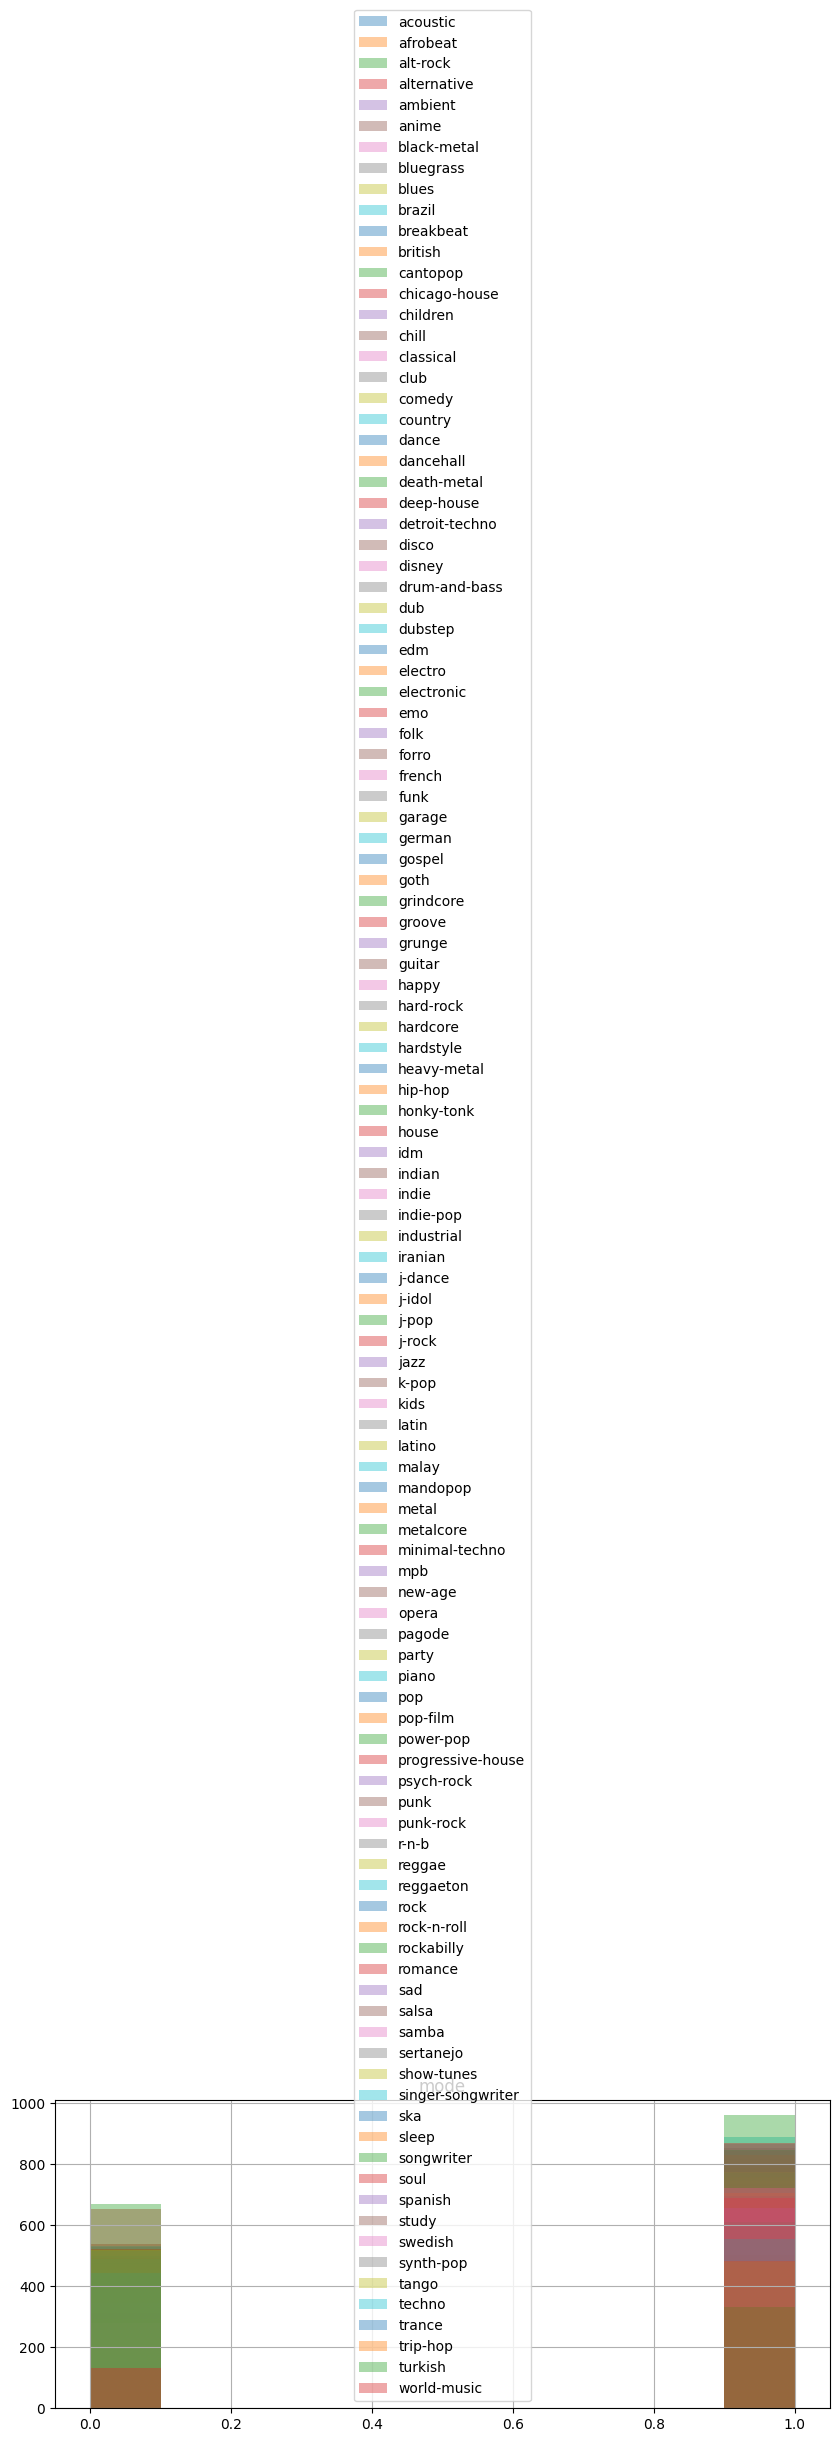

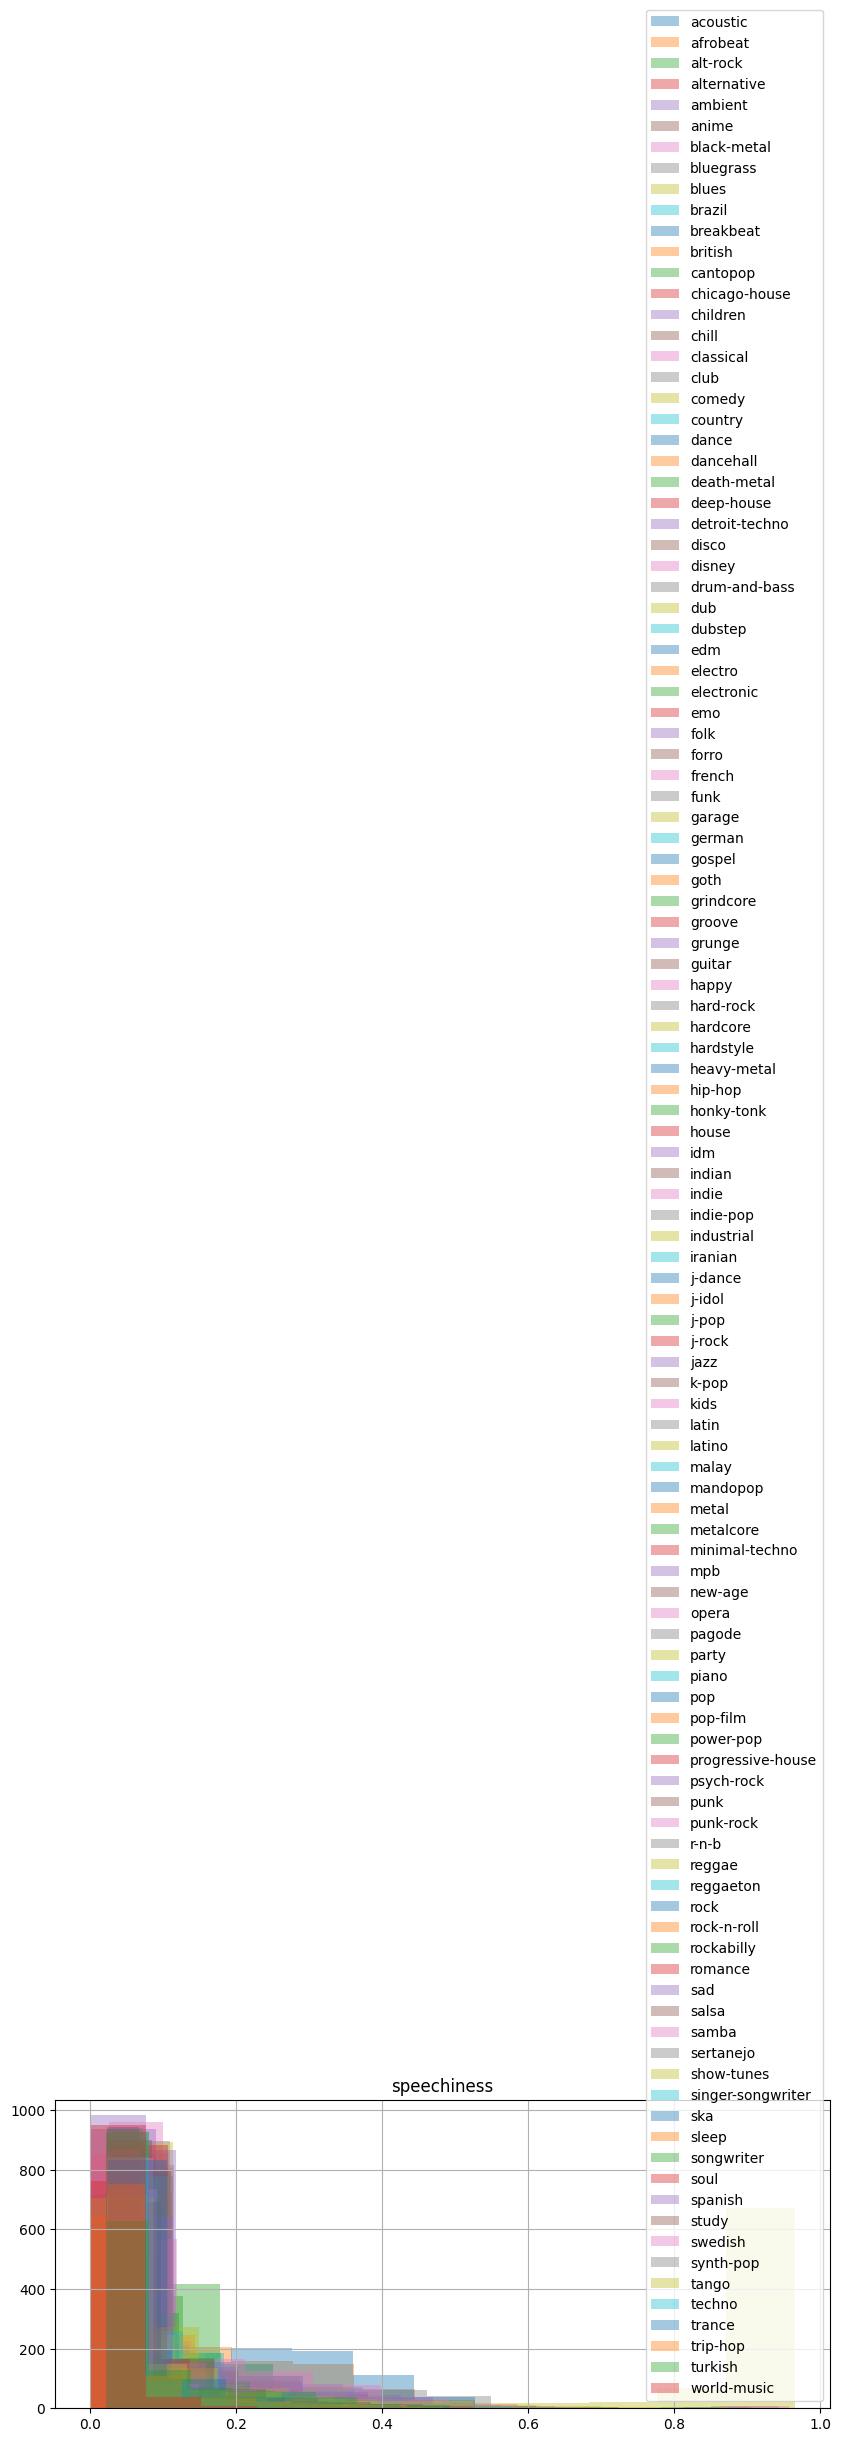

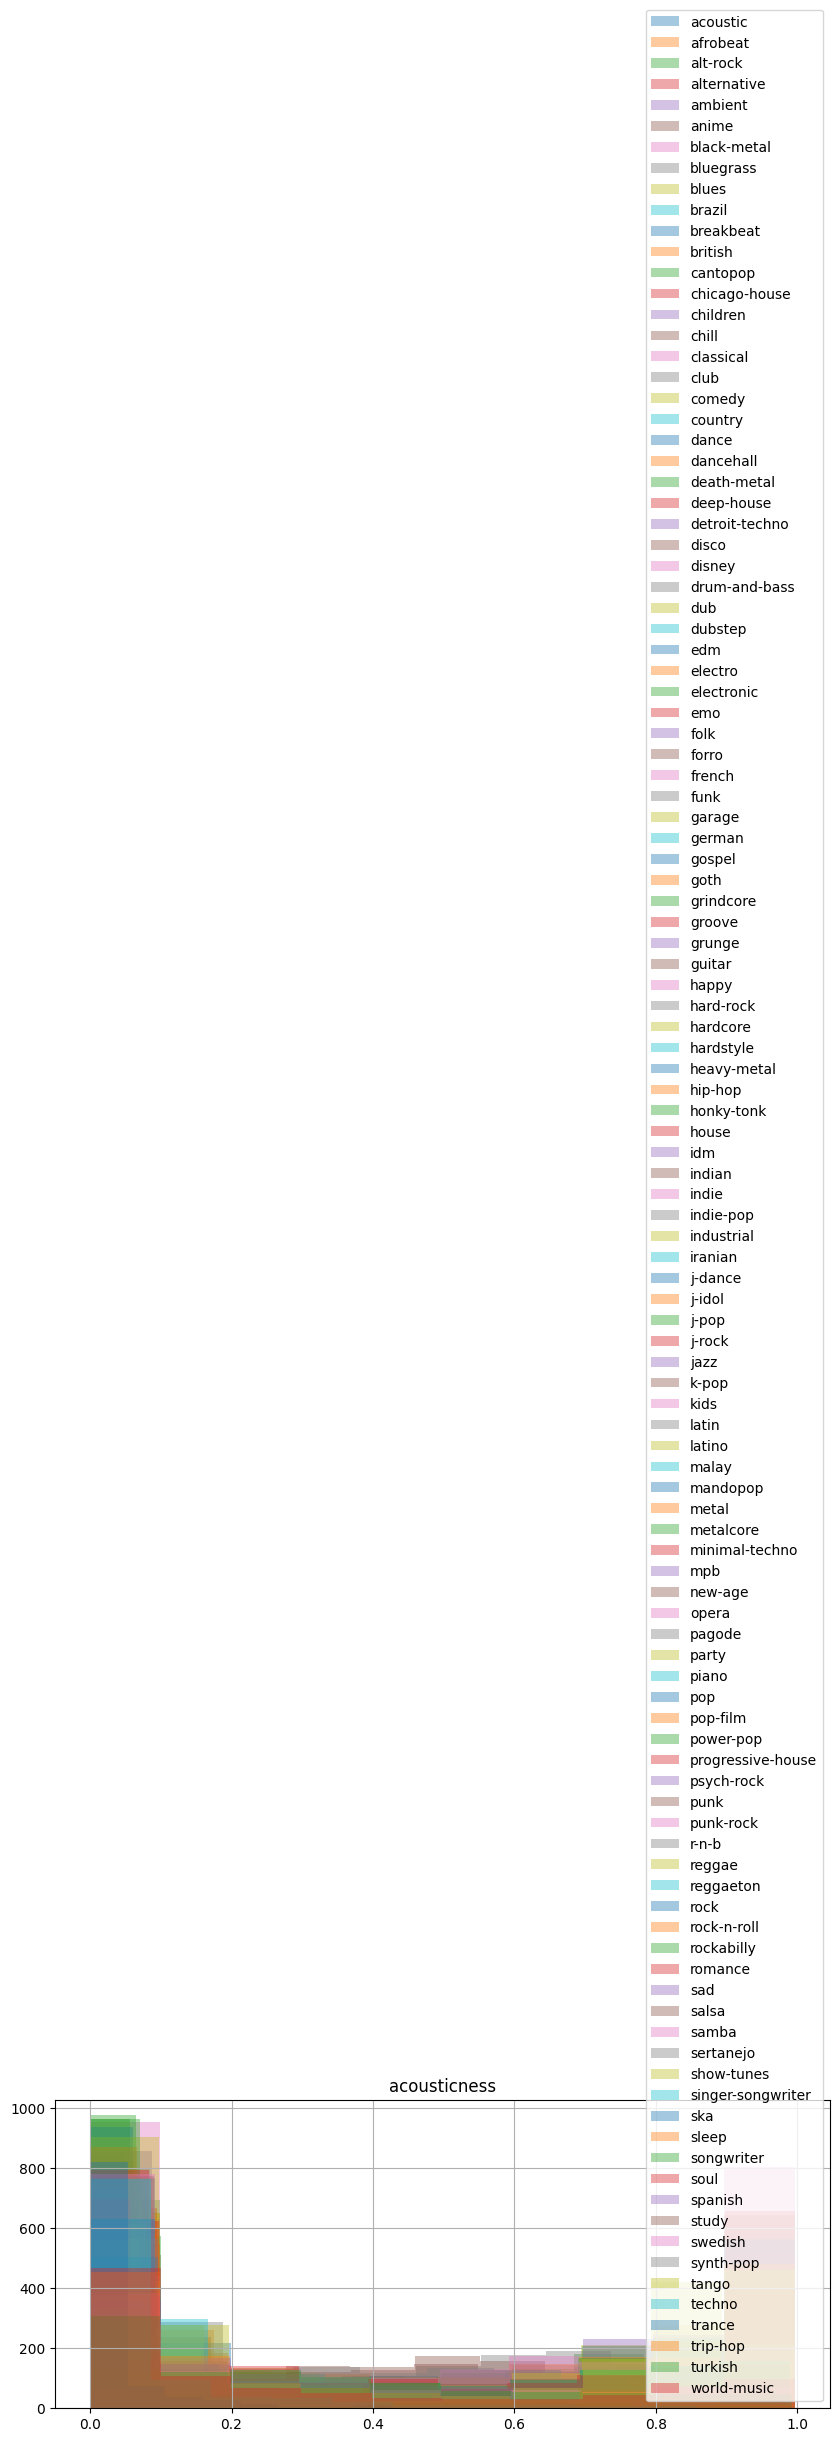

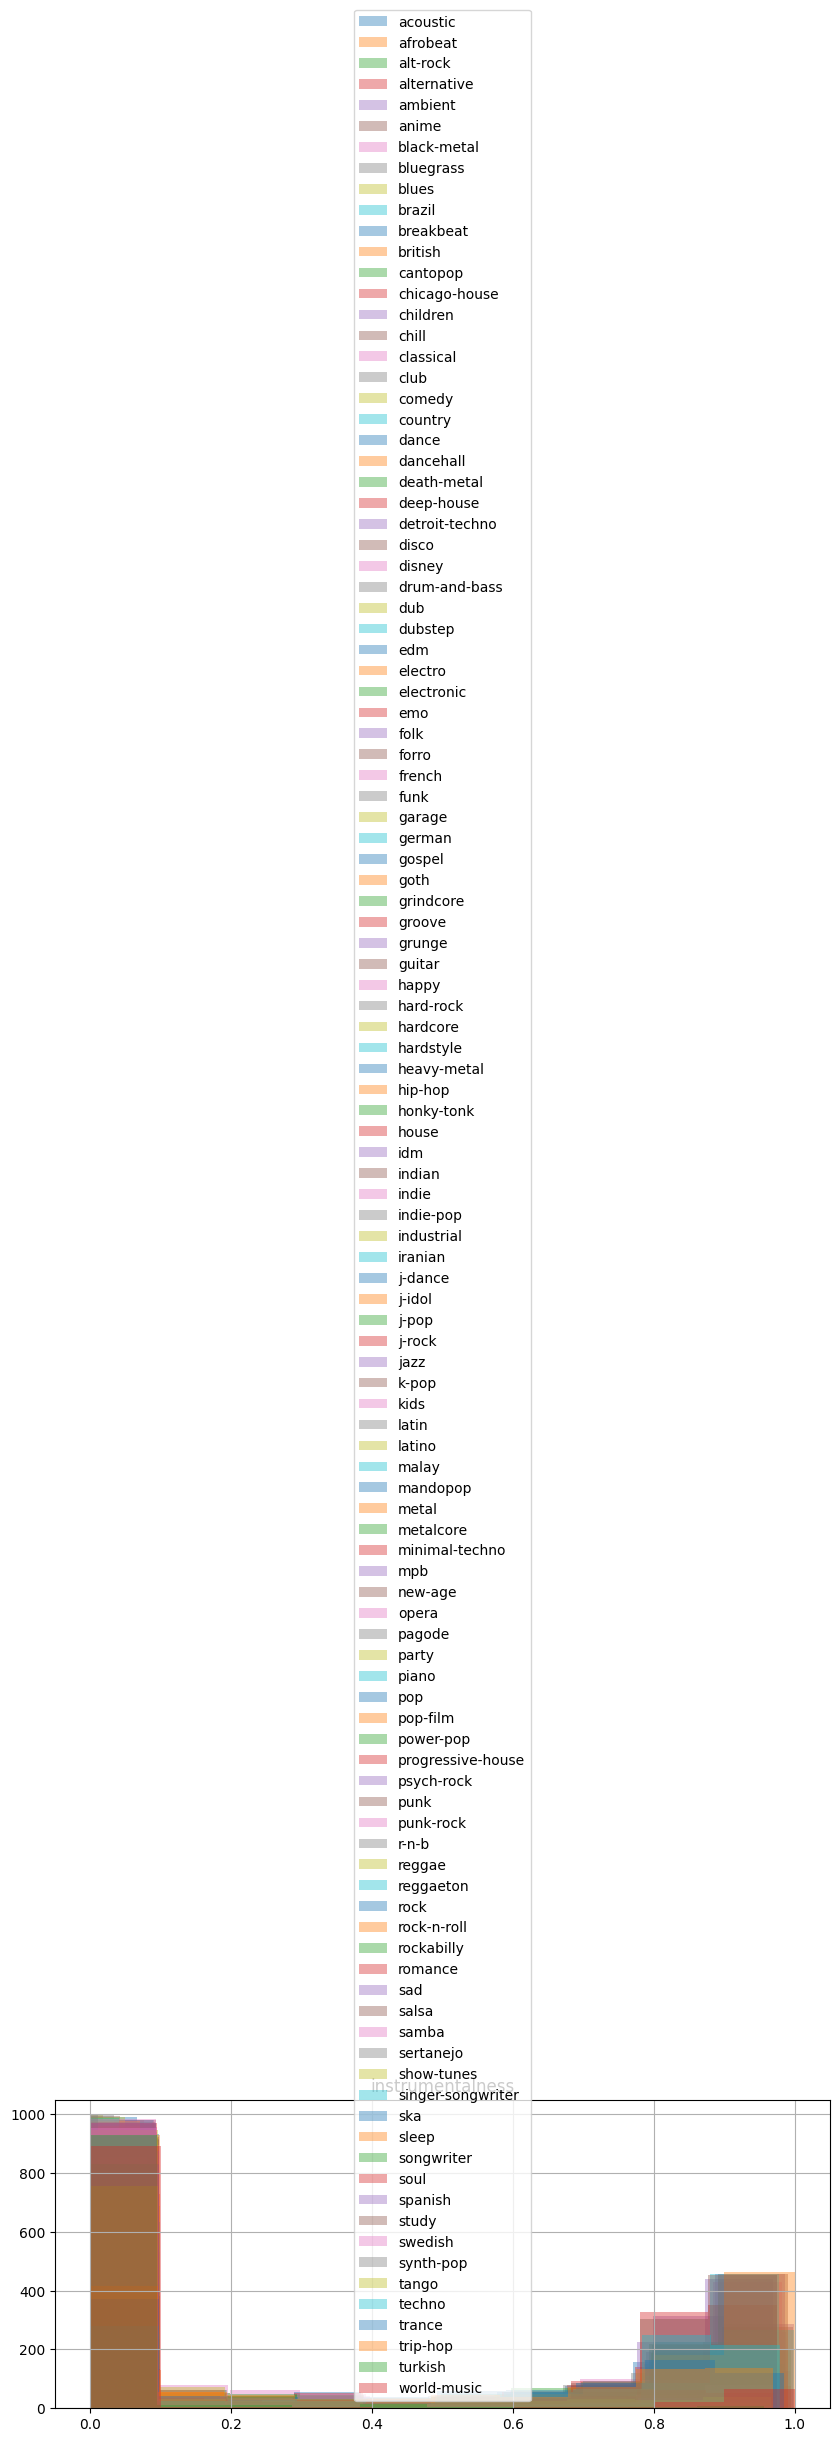

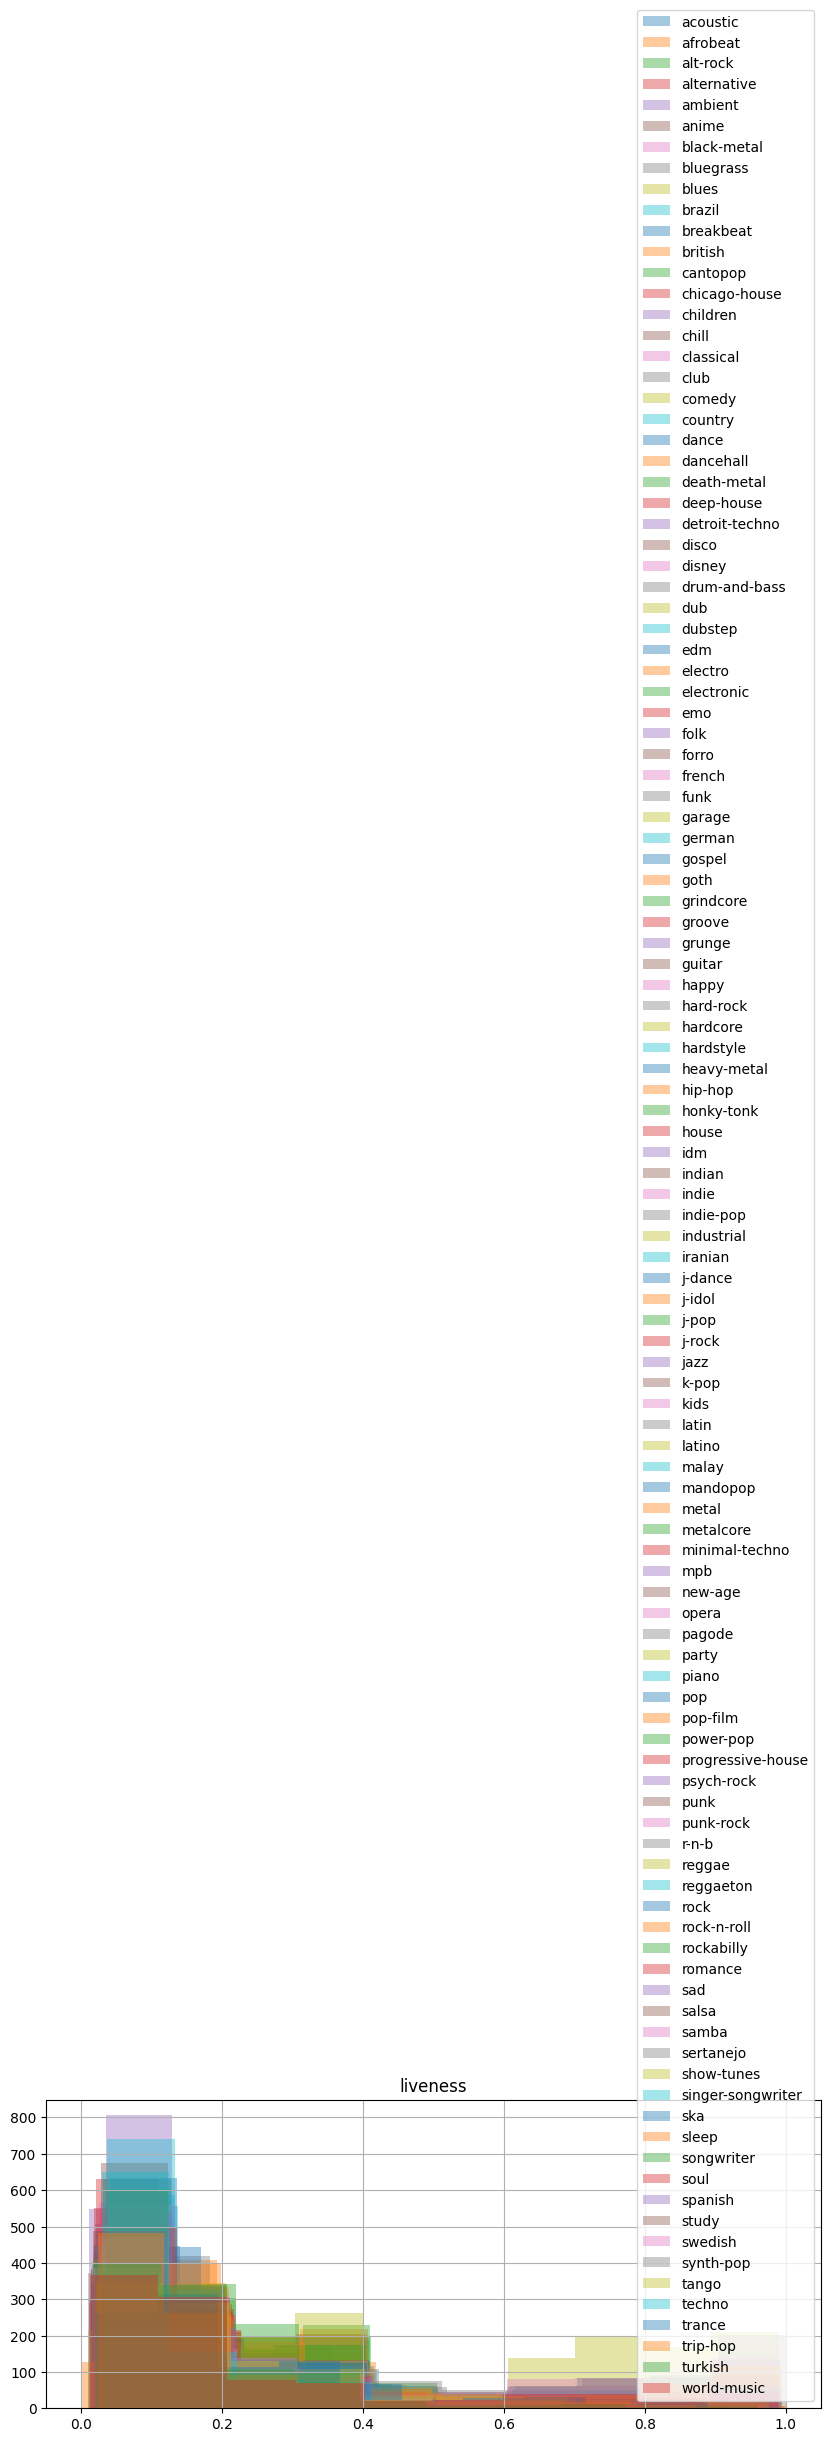

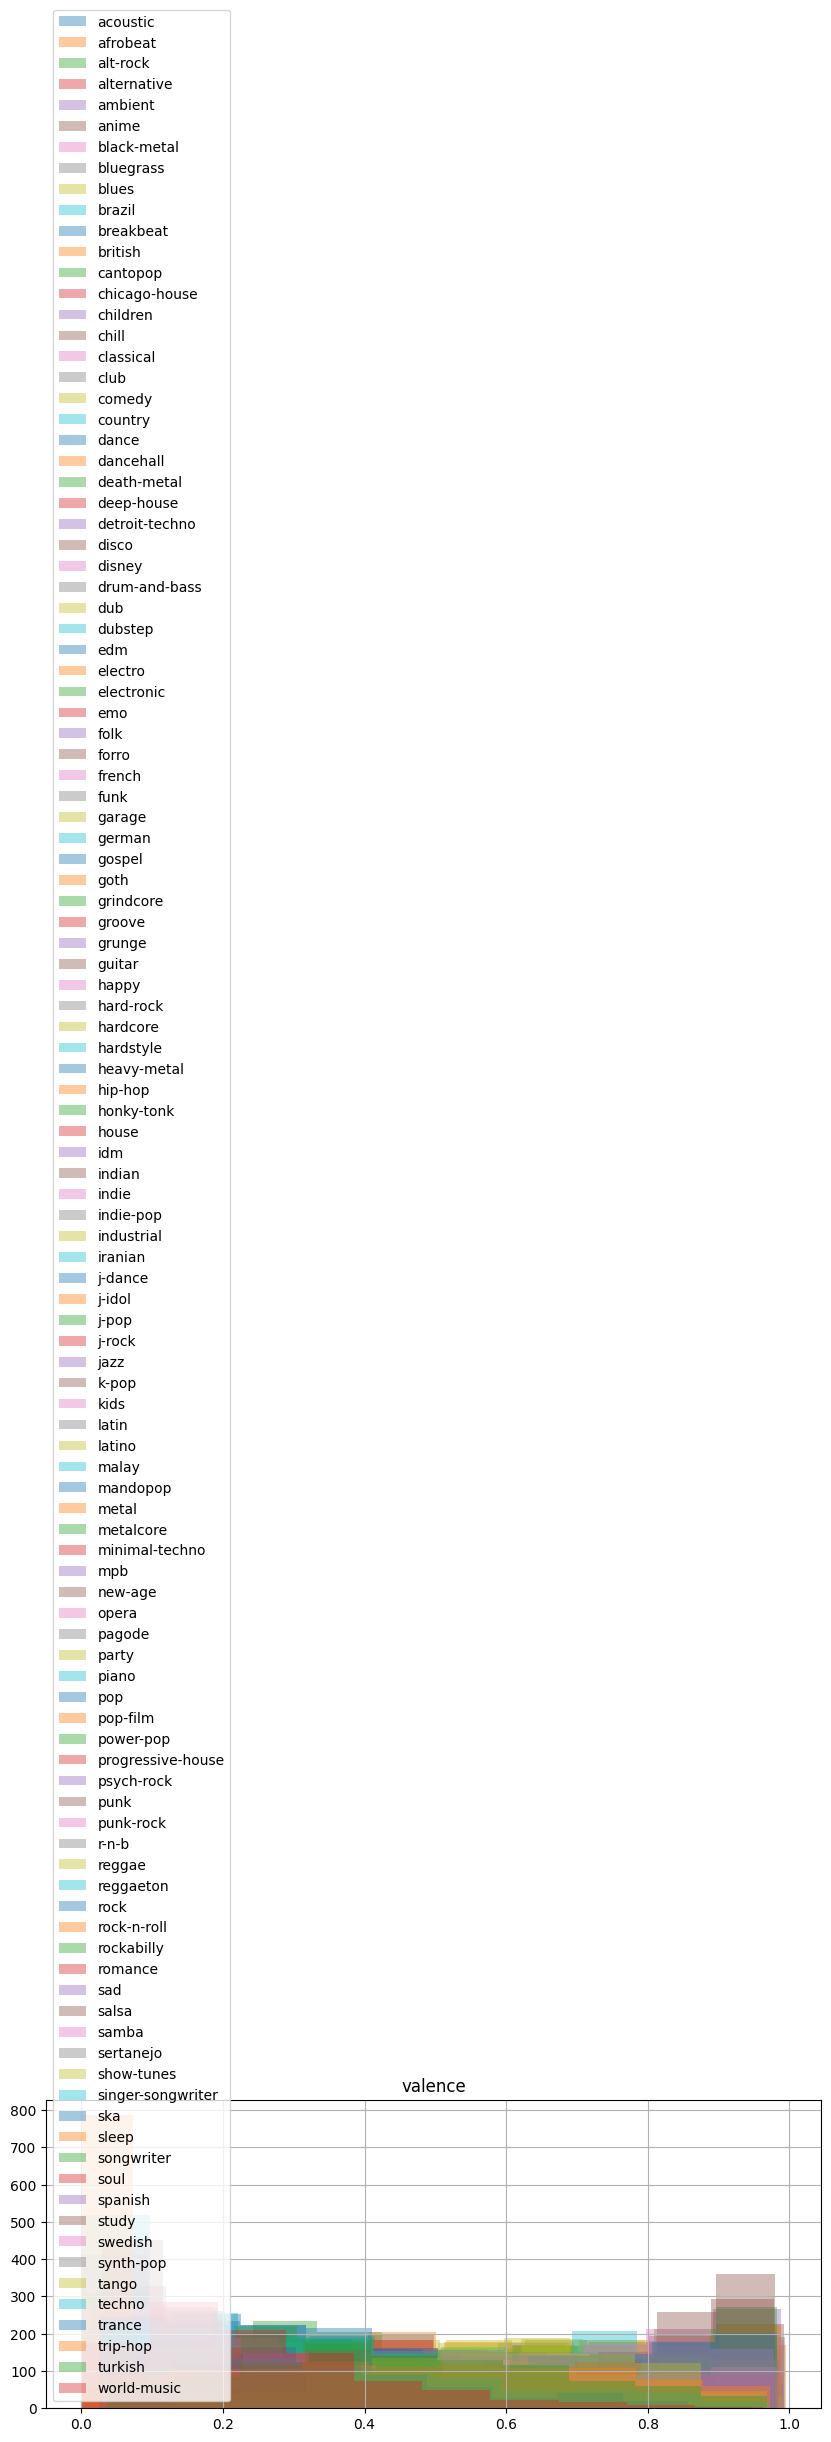

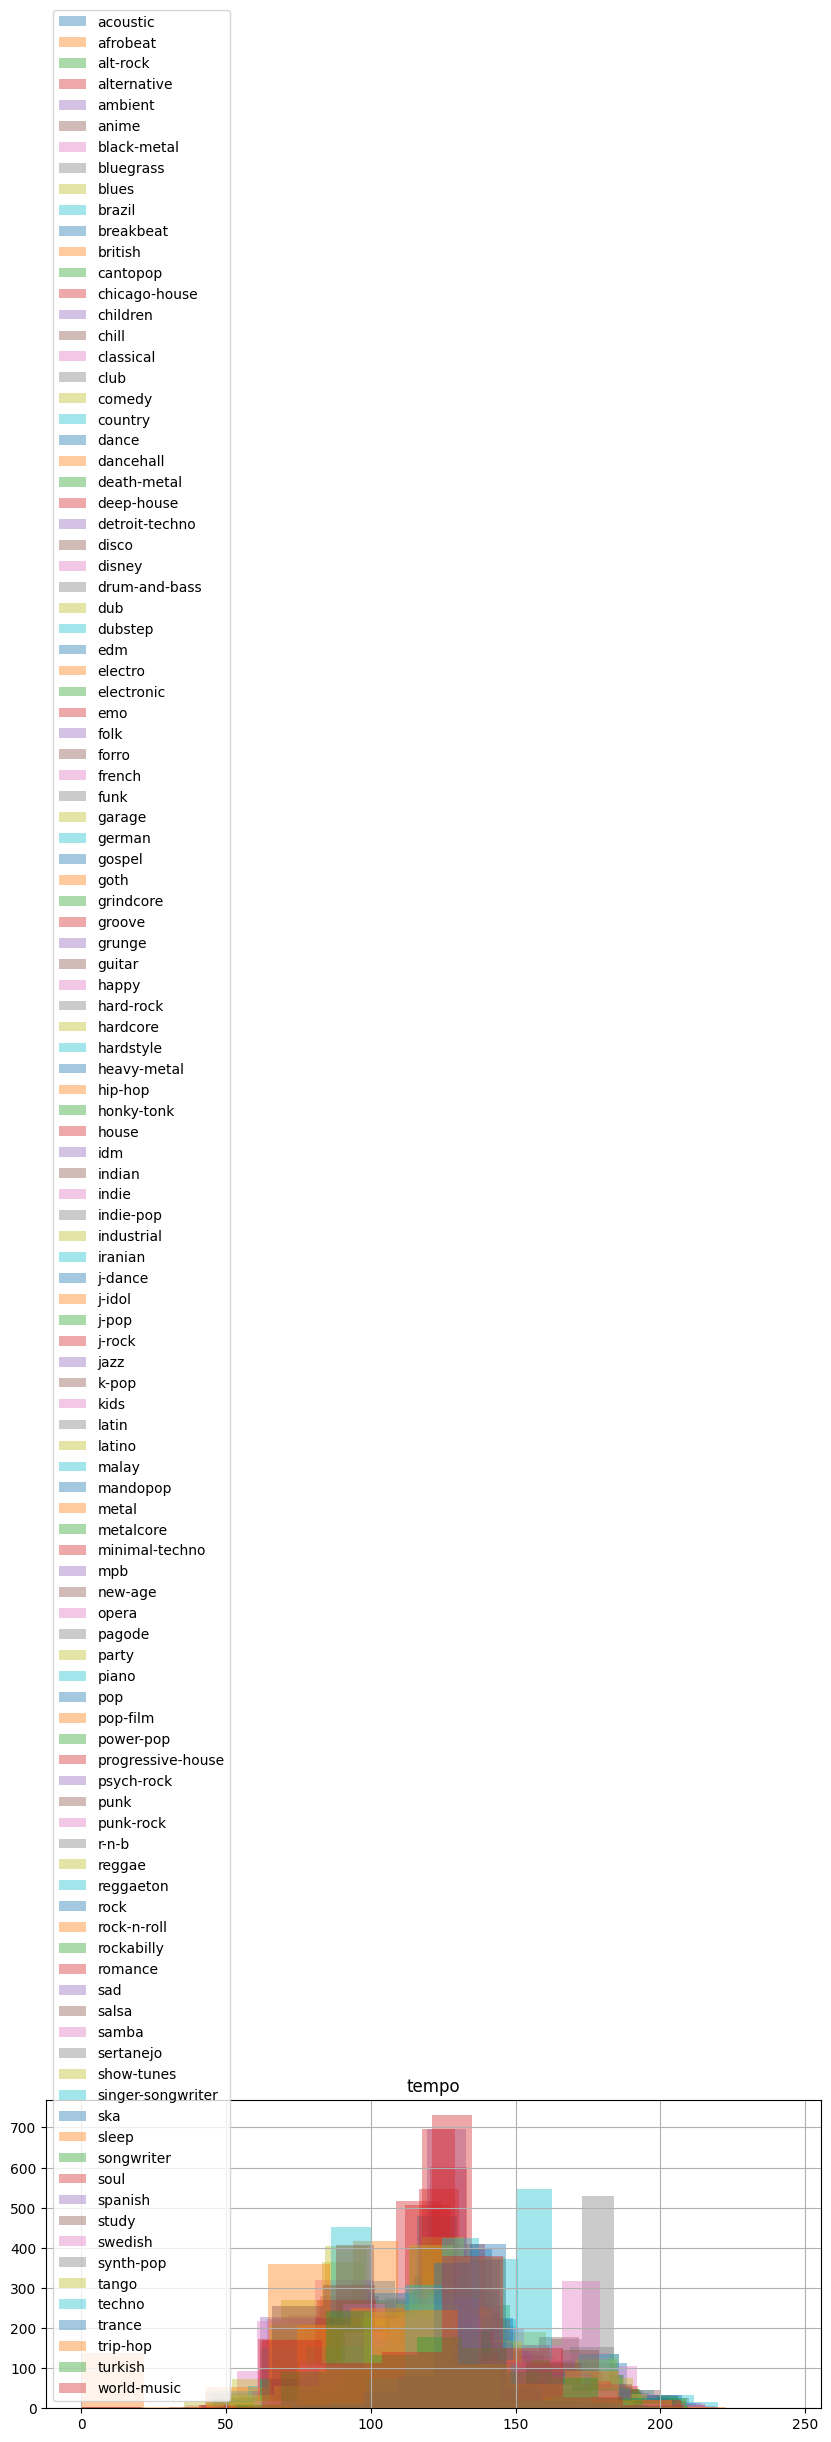

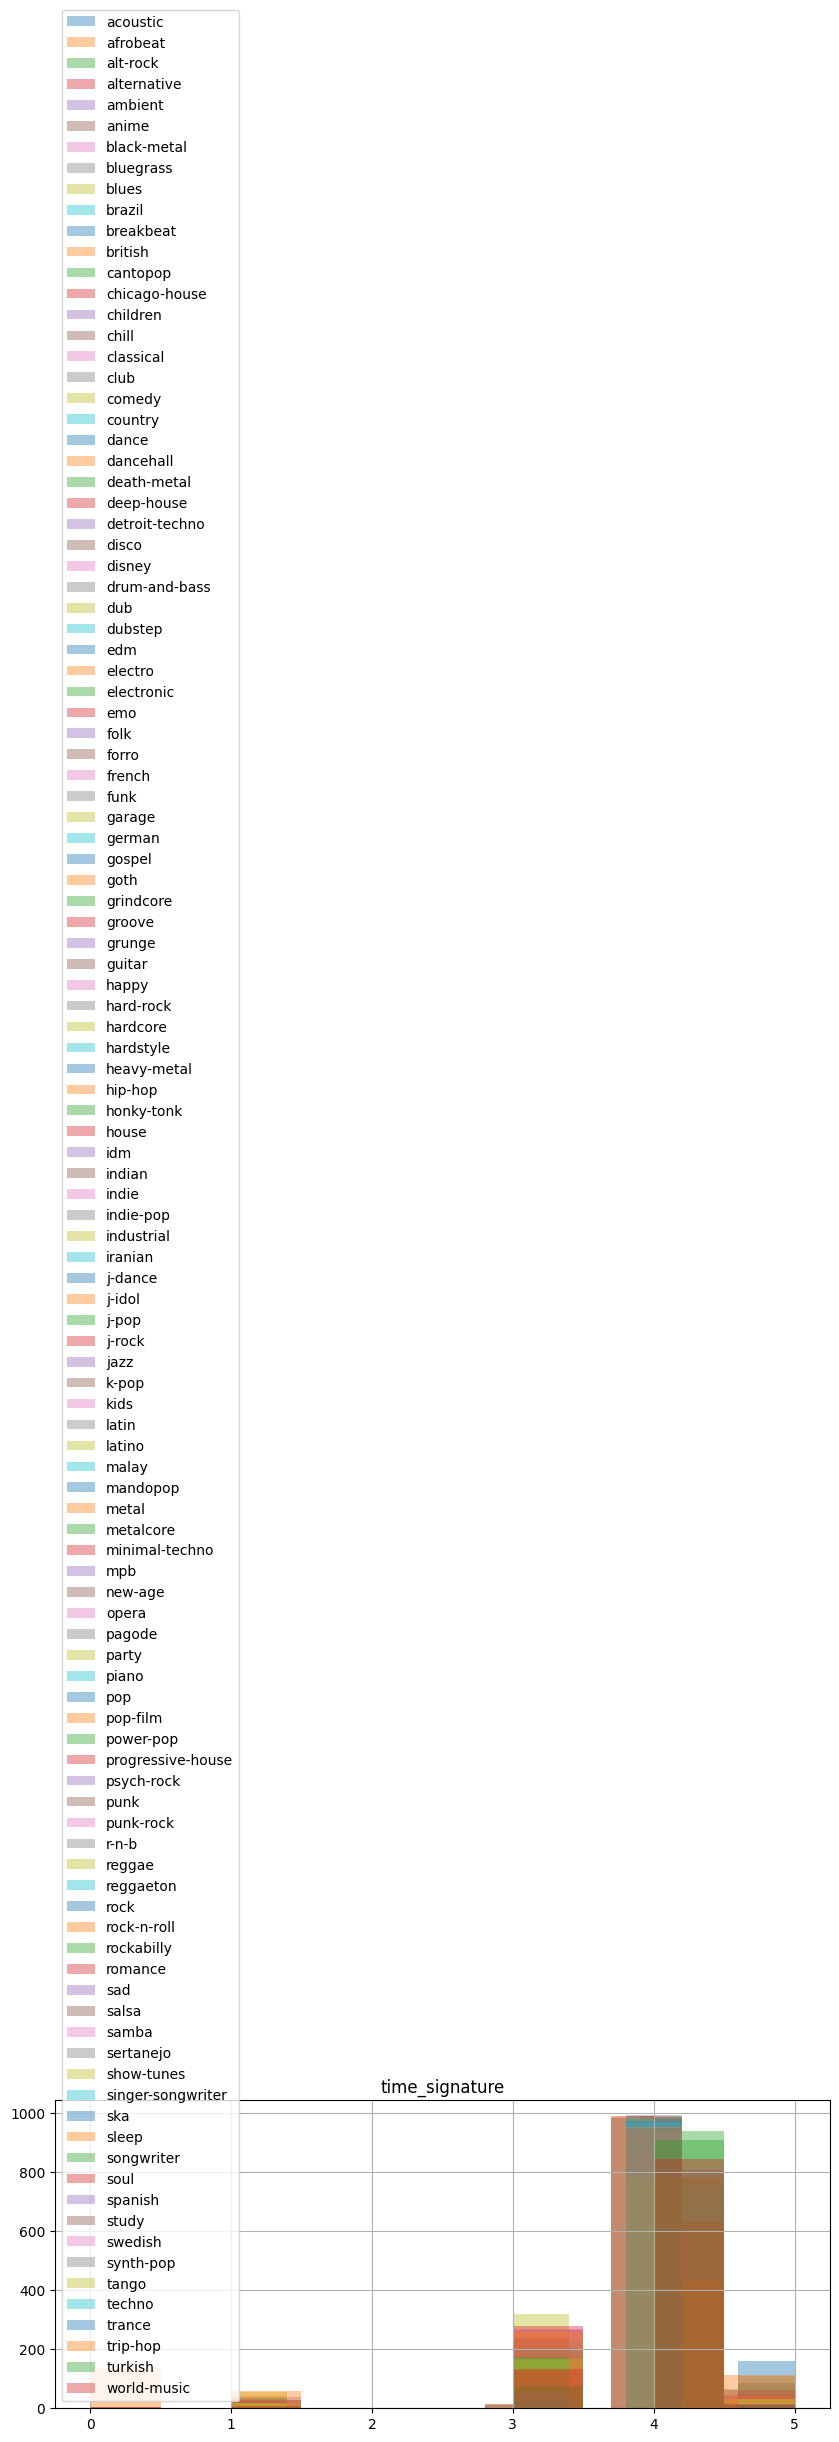

In [15]:
grouped_genre = df.groupby('track_genre')

for col in numeric.columns:
    fig, ax = plt.subplots()
    for i, d in grouped_genre:
        d[col].hist(alpha=0.4, ax=ax, label=i, figsize=(10,4)) 
        ax.set_title(col)
    ax.legend()
    plt.show()

In [16]:
grouped_genre.mean()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,,,,
acoustic,214896.957,0.549593,0.435368,5.045,-9.447843,0.816,0.043247,0.566816,0.038336,0.153244,0.424023,119.010624,3.885
afrobeat,248412.791,0.669580,0.702812,5.551,-7.789353,0.511,0.086579,0.270860,0.253483,0.184596,0.698619,119.213337,3.946
alt-rock,235455.907,0.534493,0.754173,5.738,-6.191489,0.641,0.055071,0.122162,0.054097,0.210249,0.518260,124.634404,3.939
alternative,222016.180,0.559927,0.720030,5.567,-6.078777,0.606,0.070101,0.147820,0.038159,0.201376,0.495570,122.232394,3.942
ambient,237059.038,0.367867,0.237162,4.945,-18.601365,0.620,0.041562,0.776790,0.676221,0.129283,0.167498,111.113129,3.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...
techno,312311.477,0.684348,0.746413,5.515,-8.077874,0.556,0.064212,0.081414,0.540038,0.159434,0.321878,128.255482,3.967
trance,269007.478,0.583409,0.845272,5.712,-6.329711,0.484,0.079705,0.035870,0.423501,0.234357,0.276881,133.276726,3.957
trip-hop,274954.026,0.634695,0.622363,5.458,-9.239915,0.483,0.076303,0.225615,0.383761,0.190342,0.478069,118.743616,3.945


In [17]:
grouped_genre.std()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,,,,
acoustic,55615.279398,0.122203,0.236318,3.588294,3.773481,0.387678,0.025636,0.330443,0.159383,0.105335,0.222394,29.771694,0.426564
afrobeat,94681.036091,0.123840,0.175242,3.492219,2.728213,0.500129,0.086521,0.260510,0.354098,0.178077,0.202829,26.296399,0.327401
alt-rock,58622.027206,0.133999,0.173371,3.543715,2.341904,0.479947,0.036525,0.198542,0.157120,0.185865,0.234400,29.234238,0.281706
alternative,56439.461679,0.147004,0.191369,3.667555,2.340517,0.488879,0.059042,0.217751,0.130164,0.154715,0.225453,30.537223,0.301209
ambient,110874.907283,0.164653,0.210465,3.431290,8.019603,0.485629,0.029523,0.301232,0.361933,0.097280,0.143577,32.083041,0.767581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
techno,109575.848476,0.113423,0.174437,3.527920,3.060759,0.497103,0.053988,0.155445,0.377332,0.137070,0.240243,15.739662,0.232304
trance,120556.855725,0.122770,0.121645,3.512748,2.049201,0.499994,0.073413,0.072648,0.372407,0.182958,0.201360,15.015704,0.298731
trip-hop,101260.048311,0.135323,0.183117,3.609330,3.018627,0.499961,0.080414,0.255498,0.372023,0.166949,0.252264,30.478439,0.319495


In [18]:
grouped_genre.min()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,,,,
acoustic,59823,0.213,0.01190,0,-28.276,0,0.0232,0.000006,0.0,0.0284,0.0419,53.845,1
afrobeat,31824,0.285,0.19800,0,-20.913,0,0.0231,0.000079,0.0,0.0219,0.0765,56.499,1
alt-rock,84973,0.112,0.20100,0,-18.108,0,0.0230,0.000003,0.0,0.0144,0.0378,52.401,0
alternative,84973,0.112,0.19000,0,-17.764,0,0.0233,0.000003,0.0,0.0243,0.0364,52.401,1
ambient,41904,0.000,0.00144,0,-41.808,0,0.0000,0.000002,0.0,0.0345,0.0000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
techno,68390,0.245,0.15600,0,-22.772,0,0.0243,0.000008,0.0,0.0292,0.0270,73.098,1
trance,30474,0.137,0.40600,0,-16.545,0,0.0250,0.000012,0.0,0.0204,0.0268,72.434,1
trip-hop,37626,0.183,0.12000,0,-23.405,0,0.0241,0.000007,0.0,0.0233,0.0279,37.490,1


In [19]:
grouped_genre.max()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,,,,
acoustic,578064,0.879,0.974,11,-1.963,1,0.403,0.992,0.978,0.944,0.975,204.961,5
afrobeat,828586,0.974,0.996,11,-2.038,1,0.924,0.977,0.982,0.992,0.995,220.081,5
alt-rock,722200,0.922,0.997,11,-1.795,1,0.304,0.983,0.880,0.989,0.977,215.513,5
alternative,536000,0.969,0.991,11,-0.223,1,0.473,0.983,0.847,0.965,0.968,205.528,5
ambient,1041520,0.853,0.974,11,-4.431,1,0.761,0.996,0.986,0.975,0.962,213.848,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
techno,600500,0.952,0.999,11,0.550,1,0.578,0.857,0.979,0.986,0.970,201.643,5
trance,781623,0.899,0.999,11,1.023,1,0.830,0.532,0.985,0.889,0.949,196.118,5
trip-hop,1128600,0.985,0.992,11,-2.692,1,0.533,0.989,0.969,0.969,0.973,222.605,5


In [22]:
genre_count = {}
for gen in np.unique(genre):
    genre_count[gen] =len(df[df['track_genre'] == gen])
genre_count

{'acoustic': 1000,
 'afrobeat': 1000,
 'alt-rock': 1000,
 'alternative': 1000,
 'ambient': 1000,
 'anime': 1000,
 'black-metal': 1000,
 'bluegrass': 1000,
 'blues': 1000,
 'brazil': 1000,
 'breakbeat': 1000,
 'british': 1000,
 'cantopop': 1000,
 'chicago-house': 1000,
 'children': 1000,
 'chill': 1000,
 'classical': 1000,
 'club': 1000,
 'comedy': 1000,
 'country': 1000,
 'dance': 1000,
 'dancehall': 1000,
 'death-metal': 1000,
 'deep-house': 1000,
 'detroit-techno': 1000,
 'disco': 1000,
 'disney': 1000,
 'drum-and-bass': 1000,
 'dub': 1000,
 'dubstep': 1000,
 'edm': 1000,
 'electro': 1000,
 'electronic': 1000,
 'emo': 1000,
 'folk': 1000,
 'forro': 1000,
 'french': 1000,
 'funk': 1000,
 'garage': 1000,
 'german': 1000,
 'gospel': 1000,
 'goth': 1000,
 'grindcore': 1000,
 'groove': 1000,
 'grunge': 1000,
 'guitar': 1000,
 'happy': 1000,
 'hard-rock': 1000,
 'hardcore': 1000,
 'hardstyle': 1000,
 'heavy-metal': 1000,
 'hip-hop': 1000,
 'honky-tonk': 1000,
 'house': 1000,
 'idm': 1000,


In [23]:
org_genre=df['track_genre']


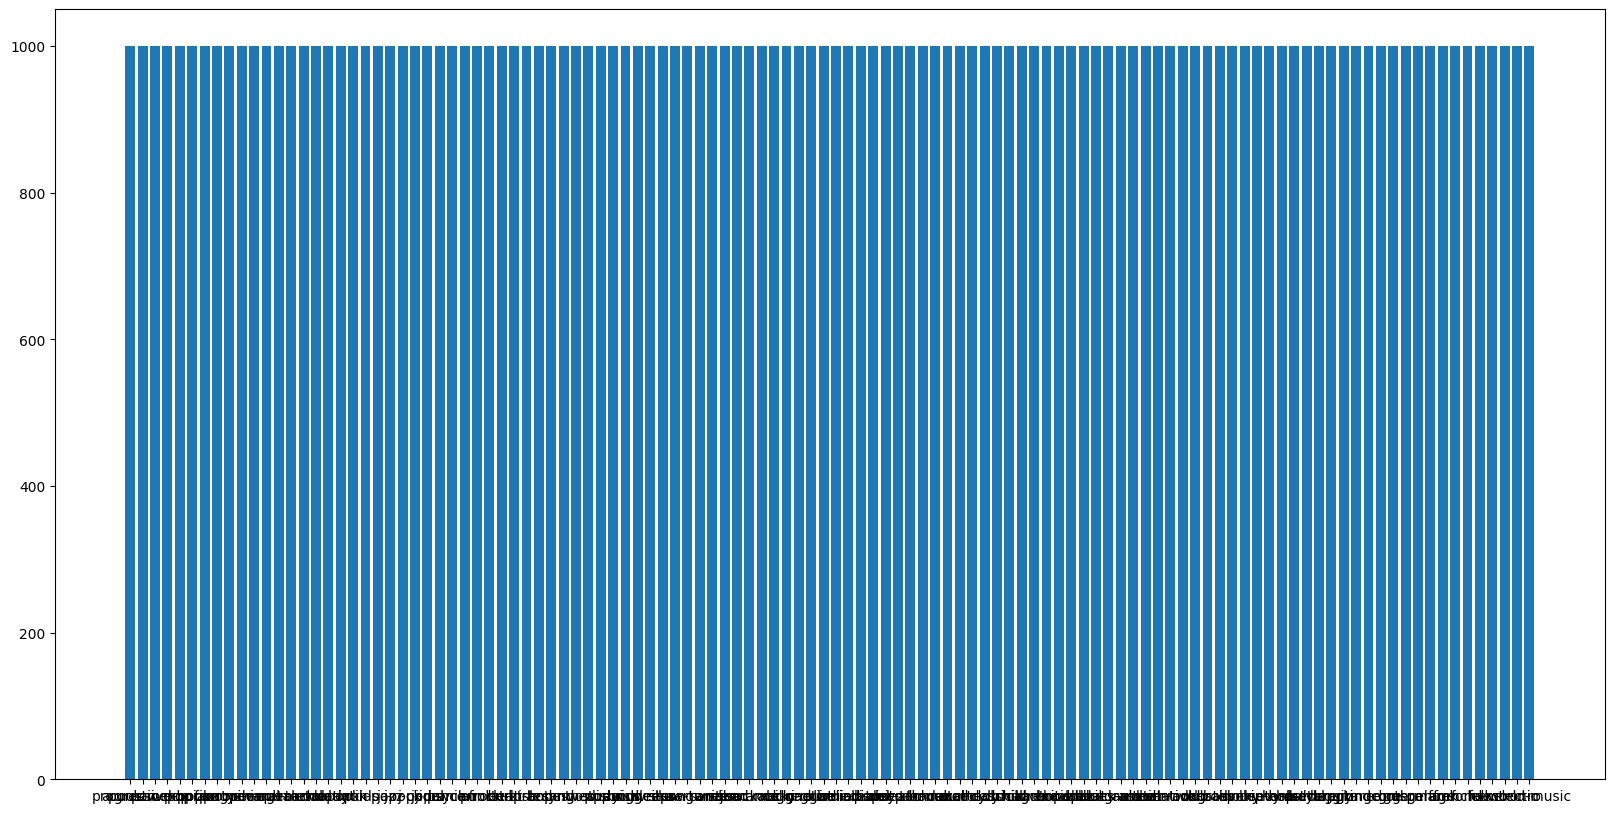

In [24]:
fig = plt.figure(figsize=(20,10))
plt.bar (height=df['track_genre'].value_counts().values, x=df['track_genre'].value_counts().index)
plt.show()

<Axes: >

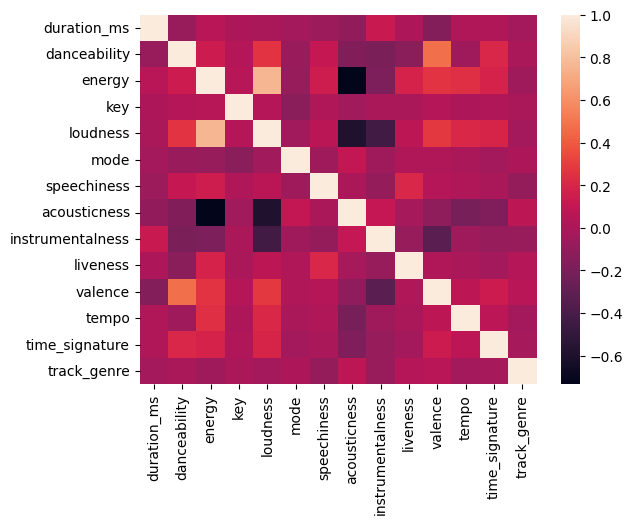

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import joblib
df['track_genre'] = LabelEncoder().fit_transform(df['track_genre'])
corr = df.corr()
sns.heatmap(data=corr)

In [30]:
features = df.drop(['key', 'mode', 'time_signature', 'danceability', 'track_genre'],axis=1)
features

,duration_ms,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,230666,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917
1,149610,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489
2,210826,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332
3,201933,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740
4,198853,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...,...,...
113995,384999,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995
113996,385000,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239
113997,271466,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378
113998,283893,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960


In [31]:
labels = df['track_genre']
#applying feature scaling 
sc=StandardScaler()
features=sc.fit_transform(features)
joblib.dump (sc,"transform.save")
#To handle imbalance in dataset performing oversampling
oversample= SMOTE()
Bfeatures,abels = oversample. fit_resample(features, labels)
#Seperating train(80%) and test data(20%)
xtrain,xtest,ytrain,ytest=train_test_split(features, labels, test_size=0.2, shuffle=True)


In [32]:
features.shape

(114000, 9)

In [34]:
df['track_genre'].iloc[36654]

36

In [35]:
xtrain.shape

(91200, 9)

In [37]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
cv = RepeatedStratifiedKFold (n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(model, xtrain, ytrain, scoring='accuracy',cv=cv, n_jobs=-1, error_score= 'raise')

In [38]:
n_scores

array([0.20964912, 0.20679825, 0.19594298, 0.20307018, 0.20032895,
       0.19583333, 0.20844298, 0.20307018, 0.20010965, 0.20899123,
       0.20482456, 0.20339912, 0.20120614, 0.19736842, 0.20844298,
       0.20296053, 0.20339912, 0.19813596, 0.20679825, 0.20087719,
       0.19375   , 0.19725877, 0.2060307 , 0.20394737, 0.20701754,
       0.20493421, 0.19791667, 0.20526316, 0.20504386, 0.20975877])

In [39]:
n_scores.mean()

0.2030190058479532

In [40]:
model = BaggingClassifier()
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
pred

array([45, 99, 74, ..., 40, 20, 43], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_score (ytest, pred)

0.20144736842105262

In [42]:
f1_score (ytest, pred, average='weighted')

0.19964310254560177

In [43]:
joblib.dump (model, "bagging.model")

['bagging.model']